In [14]:
def calculate_gc_content(sequence):
    """Return the GC content of a sequence as a float
    sequence -- a string representing a DNA sequence
    """
    #Make sure sequence is uppercase
    sequence = sequence.upper()
    gc_dinucs = sequence.count("GC")
    total_dinucs = len(sequence) 
    gc_freq = gc_dinucs/total_dinucs 
    return gc_freq

In [15]:
#### Calculating expected GC content

def calculate_expected_gc_content(sequence):
    """Return the expected CG content of a sequence as a float
    sequence -- a string representing a DNA sequence
    
    The expected CG content is calculated
    under the assumption that C and G nucleotides 
    occur independently. If that were true,
    then the frequency of CG dinucleotides would
    just be the frequency of G nucleotides times
    the frequency of C nucleotides.
    """
    #Need to ensure sequence is uppercase
    sequence = sequence.upper()
    freq_g = sequence.count("G")/len(sequence)
    freq_c = sequence.count("C")/len(sequence)
    
    freq_gc = freq_g * freq_c 
    return freq_gc

In [3]:
human_genome_filepath = './GCF_000001405.39_GRCh38.p13_cds_from_genomic.fna'
human_genome_file = open(human_genome_filepath)
human_genome_file.close()

In [4]:
def parse_fasta_file(input_file):
    """Return a dict of {id:gene_seq} pairs based on the sequences in the input FASTA file
    input_file -- a file handle for an input fasta file
    """
    parsed_seqs = {}
    curr_seq_id = None
    curr_seq = []

    for line in f:
        line = line.strip()

        if line.startswith(">"):
            if curr_seq_id is not None:
                parsed_seqs[curr_seq_id] = ''.join(curr_seq)

            curr_seq_id = line[1:]
            curr_seq = []
            continue

        curr_seq.append(line)

    #Add the final sequence to the dict
    parsed_seqs[curr_seq_id] = ''.join(curr_seq)
    return parsed_seqs

In [5]:
#Normally this would be determined
#by user input via argparse. Hard-coded for now

input_file = human_genome_filepath

f = open(input_file)
parsed_seqs = parse_fasta_file(input_file)
print("Done parsing genome")

Done parsing genome


In [16]:

expected_gc_freqs = {}
observed_gc_freqs = {}

for gene_id, sequence in parsed_seqs.items():
    
     #Run our functions to calculate the frequency
    #of observed and expected CGs for this specific sequence
    observed_gc_freq = calculate_gc_content(sequence)
    expected_gc_freq = calculate_expected_gc_content(sequence)
    
    #Save the results in dictionaries for later use
    expected_gc_freqs[gene_id] = expected_gc_freq
    observed_gc_freqs[gene_id] = observed_gc_freq

total_genes = len(observed_cg_freqs)
print(f"Done calculating GC dinucleotide frequency for {total_genes} ...")

Done calculating GC dinucleotide frequency for 124038 ...


In [17]:
expected_values = [] #Let's build a list of expected GC dinucleotide frequency values
observed_values = [] #...and a list of expected GC dinucleotide frequency values in the same order

#Critically both sets of values must be in the same order,
#We can use a for loop to look up the observed value that 
#corresponds with each expected value, using the gene id
#to connect our two dicts of results, like this:

for gene_id, expected_gc_freq in expected_gc_freqs.items():
    
    #look up the observed value in the other dictionary
    observed_gc_freq = observed_gc_freqs[gene_id]    
    expected_values.append(expected_gc_freq)
    observed_values.append(observed_gc_freq)

In [18]:
n_examples = 10
example_expected_values = expected_values[0:n_examples]
example_observed_values = observed_values[0:n_examples]
print(f"Example observed GC dinucleotide frequencies: {example_observed_values}")
print(f"Example expected GC dinucleotide frequencies: {example_expected_values}")

Example observed GC dinucleotide frequencies: [0.03873598369011213, 0.058823529411764705, 0.06187624750499002, 0.04153354632587859, 0.14558366622281402, 0.04153354632587859, 0.04153354632587859, 0.04153354632587859, 0.04153354632587859, 0.04153354632587859]
Example expected GC dinucleotide frequencies: [0.04501429297321899, 0.07415951129907301, 0.07527460049959961, 0.05214801507506343, 0.11715976074904517, 0.05214801507506343, 0.05214801507506343, 0.05214801507506343, 0.05214801507506343, 0.05214801507506343]


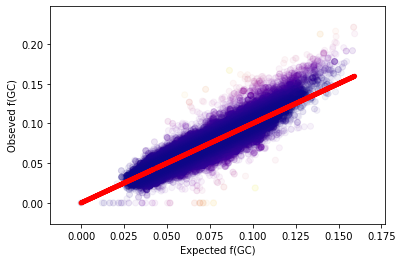

In [19]:
import matplotlib.pyplot as plt
xs = expected_values
ys = observed_values

colors = [((x - y)**2) for x,y in zip(xs,ys)]

#Build the scatter plot
plt.scatter(xs,ys,c=colors,cmap = 'plasma',alpha = 0.05)

#Plot the line representing expected values
#NOTE: I did not in any way remember all these parameters, 
#I have to look it up almost every time in the reference:
#https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(xs, xs, color = 'red',linestyle='solid',linewidth=5.0)

#Add x and y labels
plt.xlabel("Expected f(GC)")
plt.ylabel("Obseved f(GC)")

#For convenience save x and y values in xs and ys
xs = expected_values
ys = observed_values


#Show the plot
plt.show()